## 1.The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

## i) Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

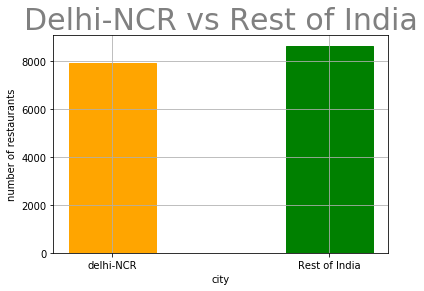

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
cl=df[(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|(df['City']=='Faridabad')]
cll=df[(df['Country Code']==1) & ((df['City']!='New Delhi')|(df['City']!='Ghaziabad')|(df['City']!='Noida')|(df['City']!='Gurgaon')|(df['City']!='Faridabad'))]
#print(len(cl))
x=['delhi-NCR','Rest of India']
y=[len(cl),len(cll)]
barlist=plt.bar(x,y,edgecolor='black',width=0.4)
barlist[0].set_color('orange')
barlist[1].set_color('green')
plt.title("Delhi-NCR vs Rest of India",fontsize=30,color='grey')
plt.ylabel("number of restaurants")
plt.xlabel("city")
plt.grid()
plt.show()

## code explanation: 
We first took all the reataurants belonging to Delhi-NCR in one dataframe and the rest of India in another. Then we plotted a graph between the length of the two dataframes and the regions.

## graph explanantion:
From the graph we can see that the number of restaurants in the rest of India is definately greater then that of Delhi-NCR. Also, the difference between the two numbers is not that significant. Which implies that there are significantly more number of restaurants in Delhi-NCR as compared to the rest of India, if compared considering the geographical area.



## ii) Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [24]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds=set()
rs=set()
df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
cl=df[(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|(df['City']=='Faridabad')]
cll=df[(df['Country Code']==1) & ((df['City']!='New Delhi')|(df['City']!='Ghaziabad')|(df['City']!='Noida')|(df['City']!='Gurgaon')|(df['City']!='Faridabad'))]

for i in cl['Cuisines']:
    a=i.split(',')
    for j in a:
        ds.add(j.strip())
#print(ds)
#print(len(ds))

for i in cll['Cuisines']:
    a=i.split(',')
    for j in a:
        rs.add(j.strip())
        
#print(rs)
#print(len(rs))

diff=rs.difference(ds)
print("the cuisines not present in Delhi-NCR are:")
for i in diff:
    print(i)
#print(len(diff))

the cuisines not present in Delhi-NCR are:
Cajun
German
BBQ
Malwani


## code explanation:
Again we created two different dataframes consisting of data of restaurants present and Delhi-NCR and the rest of India respectively. We then stored the distict cuisines served in the two regions in two sets. For finding the cuisines present in rest of India and not in Delhi-NCR, we simply took the difference of the two sets.

For checking if the dataset is correct or not, we made an API call to zomato API to fetch the restaurants serving one of the missing cuisines(BBQ) near coding ninjas(New Delhi). We found that many restaurants are serving BBQ. Thus we conclude that due to incomplete dataset we are getting an incorrect answer.

The following code snippet fetches the list of the top 10 restaurants serving cuisine ‘BBQ’ which are nearest to Coding Ninjas(New-Delhi). This shows that the cuisine 'BBQ' is served by many restaurants in Delhi-NCR. Thus the above result is just due to incomplete dataset.

In [26]:
import requests
user_key='3754f0440b3026cde542ed69af9f499a'
basic_api='https://developers.zomato.com/api/v2.1'
params=p={'cuisines':193,'count':10,'sort':'rating','order':'desc','lat':28.697753,'lon':77.140603,'sort':'real_distance'}
#p={'city_id':1,'lat':28.697753,'lon':77.140603,'count':10,'cuisines':193}
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key}
response=requests.get(basic_api+'/search',headers=header,params=params)
data=response.json()

data = data['restaurants']
#for i in data:
    #print(i['collection']['collection_id'],i['collection']['title'])
for i in (data):
    print(i['restaurant']['name'],i['restaurant']['user_rating']['aggregate_rating'],i['restaurant']['id'],i['restaurant']['location']['locality'])
    #print(i['restaurant'])

Themis Barbecue House 4.6 18204820 Netaji Subhash Place
Barbeque Nation 4.2 9561 Netaji Subhash Place
Bengal Bar-Be-Que 3.5 19250749 Pitampura
New Bombay Bar-Be-Que 3.6 5303 Prashant Vihar
UBQ by Barbeque Nation 3.8 19082741 Lawrence Road
UBQ by Barbeque Nation 3.9 18889760 Rohini
Kays Bar-Be-Que 3.8 3079 Ashok Vihar Phase 1
Picnick Scooter Cafe 0 19149978 Punjabi Bagh
Chicken Adda 0 19179179 Rohini
7teen BBQ Bistro Bnq 3.8 18595610 Moti Nagar


## iii) Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
cl=df[(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|(df['City']=='Faridabad')]
cll=df[(df['Country Code']==1) & ((df['City']!='New Delhi')|(df['City']!='Ghaziabad')|(df['City']!='Noida')|(df['City']!='Gurgaon')|(df['City']!='Faridabad'))]

deldic={}
resdic={}
ds=[]
rs=[]
delcui=[]
rescui=[]
delcou=[]
rescou=[]
for i in cl['Cuisines']:
    a=i.split(',')
    for j in a:
        ds.append(j.strip())

for i in cll['Cuisines']:
    a=i.split(',')
    for j in a:
        rs.append(j.strip())

        
#print(len(ds))
#print(len(rs))
for i in ds:
    deldic[i]=deldic.get(i,0)+1
    
for i in rs:
    resdic[i]=resdic.get(i,0)+1
    
#print(deldic)
#print(len(deldic))
#print("----------------------------------------------------------------------")
#print(resdic)
#print(len(resdic))


k = Counter(deldic) 
high = k.most_common(10)
print("TOP 10 CUISINES SERVED IN DELHI-NCR")
print("************************************")
for i in high:
    delcui.append(i[0])
    delcou.append(i[1])
    print(i[0],i[1])
    

    
k = Counter(resdic) 
high = k.most_common(10)
print("TOP 10 CUISINES SERVED IN THE REST OF INDIA")
print("*********************************************")
for i in high:
    rescui.append(i[0])
    rescou.append(i[1])
    print(i[0],i[1])

TOP 10 CUISINES SERVED IN DELHI-NCR
************************************
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
TOP 10 CUISINES SERVED IN THE REST OF INDIA
*********************************************
North Indian 3946
Chinese 2690
Fast Food 1963
Mughlai 992
Bakery 726
Continental 724
Italian 682
South Indian 631
Cafe 627
Desserts 597


## code explanation:
Again we stored the details of the restaurants in Delhi-NCR and in the rest of India in two different datasets respectively. Then we appended all cuisines of each region in two different lists. With the help of a dictionary, we found out the frequency of each cuisine and  displayed the top 10 cuisines server in the two regions(Delhi-NCR and the rest of India). 

## iv) Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

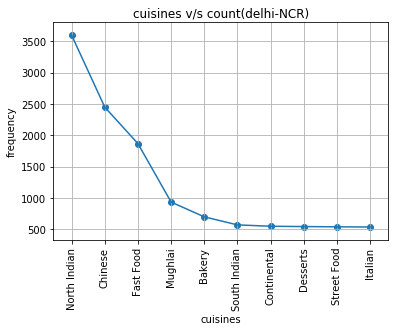

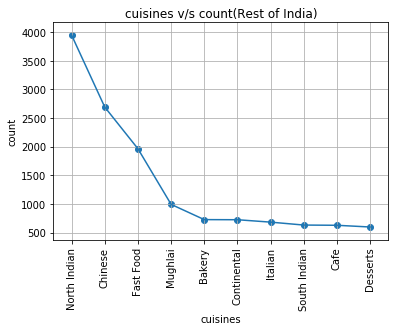

In [10]:
plt.plot(delcui,delcou)
plt.scatter(delcui,delcou)
plt.title('cuisines v/s count(delhi-NCR)')
plt.xlabel('cuisines')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()
plt.plot(rescui,rescou)
plt.scatter(rescui,rescou)
plt.title('cuisines v/s count(Rest of India)')
plt.xlabel('cuisines')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## graph explanation:
The graph is plotted between the cuisines and 
From the graph we see that there are more number of restaurants in the rest of India as compared to Delhi-NCR. Although, the curves of both graph as same in shape the scale varies sligthly. Thus, the differenc ebetween the cuisines served in Delhi-NCR an dthe rest of India is that of number of restaurants serving that cuisine, which is more in case of rest of India.


## 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

## i).Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
a)Number of Votes given Restaurant
b)Restaurant serving more number of cuisines.
c)Average Cost of Restaurant
d)Restaurant serving some specific cuisines.

## a) Number of Votes given restaurant

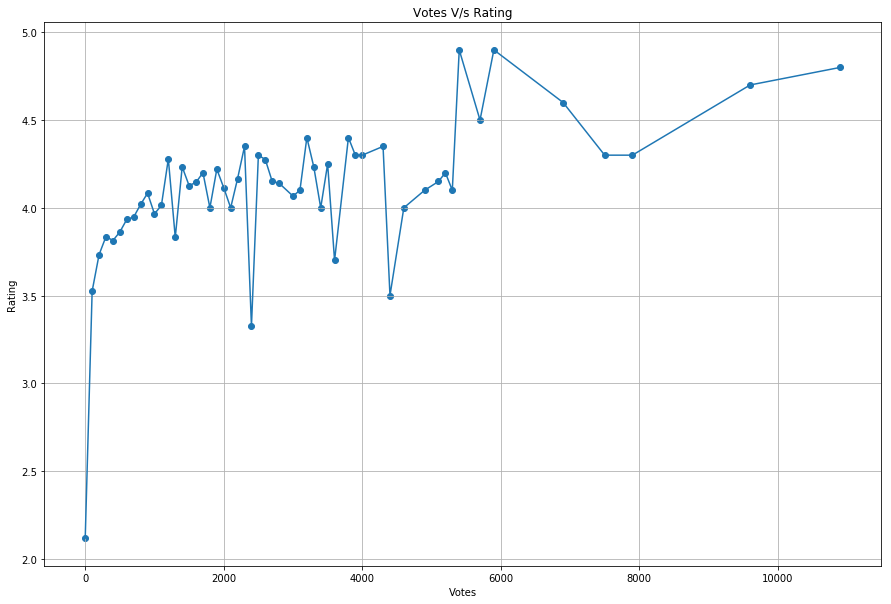

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
df.dropna(subset=['Country Code'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
cl=df[(df['Country Code']==1) & (df['Average Cost for two']!=0)]


r2=[]
for i in cl['Aggregate rating']:
    r2.append(i)

v=[]
for i in cl['Votes']:
    v.append(i)

v2=[]

for i in v:
    k=i//100
    v2.append(k*100)

dic4={}

for i in range(len(v2)):
    dic4[v2[i]]=dic4.get(v2[i],0)+r2[i]

ok={}

for i in v2:
    ok[i]=ok.get(i,0)+1
for i in dic4:
    for j in ok:
        if(i==j):
            dic4[i]=(dic4[i]/ok[j])
#print(dic4)

x=[]
y=[]

for i in sorted(dic4.keys()):
    x.append(i)
    y.append(dic4[i])

plt.figure(figsize=(15,10))
plt.plot(x,y)
plt.scatter(x,y)
plt.title('Votes V/s Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.grid()
plt.show()


## Explanation of code: 
We append the Rating into an array and the Votes into another array. We have taken a dictionary in which average rating(values) is stored with the corresponding rounded off votes(keys). Here we have taken the round off of votes to the nearest hundred because there were a lot of votes concentrated at one point and it seemed congested.
## Explanation of graph: 
The rating is between or below 3.5 and 4.5 if the votes are below or equal to 2000. We then see that as the rating increases , there is increase in number of votes. The highest rating is given by Votes that are 6000. The rating drops when the Votes are around 8000 and then again the rating rises


## b) restaurant serving more number of cuisines

2 2.563124403436212
1 2.0545219638242873
3 2.887052168447519
4 3.379166666666665
6 3.6478260869565218
5 3.478571428571428
7 3.646153846153846
8 3.266666666666667


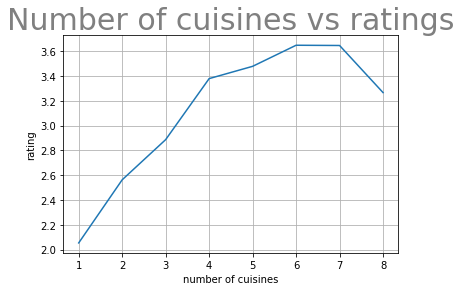

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")  #importing the csv file
df.dropna(subset=['Country Code'],inplace=True)           #dropping all the nan values
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
cl=df[(df['Country Code']==1) & (df['Average Cost for two']!=0)]   #taking value related to India and whose average cost is not 0

cuisines={}
count={}
for i in range(0,len(cl['Cuisines'])):
    a=cl.iloc[i,9].split(',')                    #spliting the cuisines in a list a
    count[str(len(a))]=count.get(str(len(a)),0)+1   #distionary for counting the frequency of a particular no. of cuisines appeared
    cuisines[str(len(a))]=cuisines.get(str(len(a)),0)+cl.iloc[i,17]  #distionary for storing the total rating of that numbe rof cuisines

for i in count:
    cuisines[i]=cuisines.get(i,0)/count[i]    #taking the average of the ratings so as to plot an efficient graph
    


for i in cuisines:               #displaying the number of cuisines and their average ratings
    print(i, cuisines[i])


cuisine_number=[1,2,3,4,5,6,7,8]
ratings=[2.054,2.563,2.887,3.379,3.478,3.648,3.646,3.266]
#ratings=[]
#for i in cl['Aggregate rating']:
    #ratings.append(i)

plt.plot(cuisine_number,ratings)          #plotting the graph
plt.title("Number of cuisines vs ratings",fontsize=30,color='grey')
plt.xlabel("number of cuisines")
plt.ylabel("average rating")
plt.grid()
plt.show()

## code explanation:
After removing all nan values and taking details of restaurants related to India in a different dataset, we took two dictionaries to store count and the total rating given to a particular number of cuisines served. We used the count dictionary to find the average rating so as to plot an efficient graph.
## graph explanation: 
From the graph we see that as the number of cuisines increases the rating seems to increase steeply linearly upto 4 cuisines. From 4-6 number of cuisines the ratings increase less steeply(with lesser slope). For 6-7 number of cuisines the rating remain almost constant but decreases as the number of cuisines reaches 8.

## c) Average Cost of Restaurant

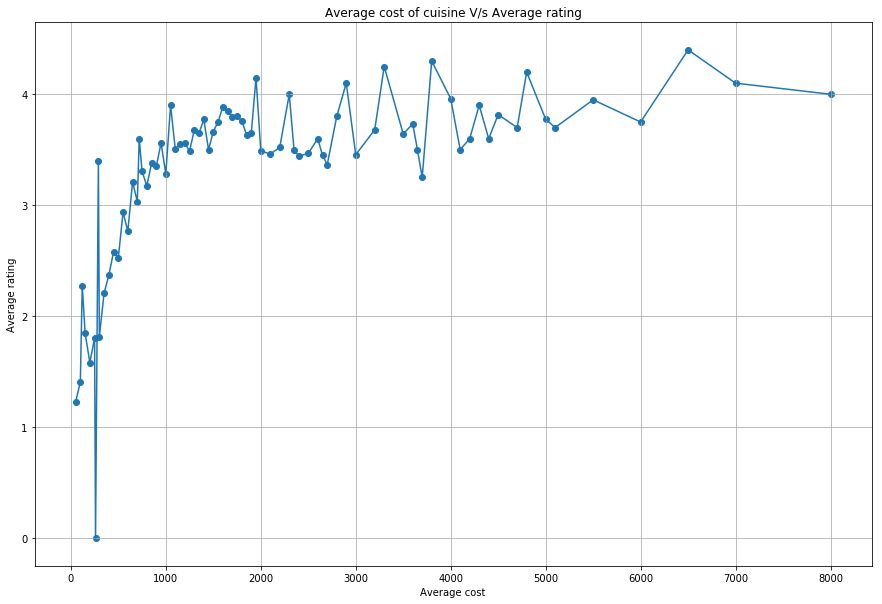

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")   #importing the csv file
df.dropna(subset=['Country Code'],inplace=True)            #
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
cl=df[(df['Country Code']==1) & (df['Average Cost for two']!=0)]


r=[]
for i in cl['Aggregate rating']:
    r.append(i)
c=[]
for i in cl['Average Cost for two']:
    c.append(i)

dic2={} #dictionary of average cost and sum of rating

for i in range(len(c)):
    dic2[c[i]]=dic2.get(c[i],0)+r[i]
   
   
nc={}

for i in c:
    nc[i]=nc.get(i,0)+1

for i in nc:
    for j in dic2:
        if(i==j):
            dic2[j]=(dic2[j]/nc[i])

av2=[]
cost=[]
 
for i in sorted(dic2.keys()):
    cost.append(i)
    av2.append(dic2[i])

#print(dic2)

plt.figure(figsize=(15,10))
plt.plot(cost,av2)
plt.scatter(cost,av2)
plt.title('Average cost of cuisine V/s Average rating')
plt.xlabel('Average cost')
plt.ylabel('Average rating')
plt.grid()
plt.show()

## Explanation of code:
 We append the Rating into an array and the Cost into another array. We have taken a dictionary in which average rating(values) is stored with the corresponding cost(keys). 
## Explanation of graph:
 The rating is increasing drastically when cost increases from 0 to 1000. Then the rating increases gradually. This shows that there is an overall increase in the rating if the average cost increases. Although the rating drops a little bit after the cost becomes more than 6500.



## d) Restaurant serving some specific cuisines.

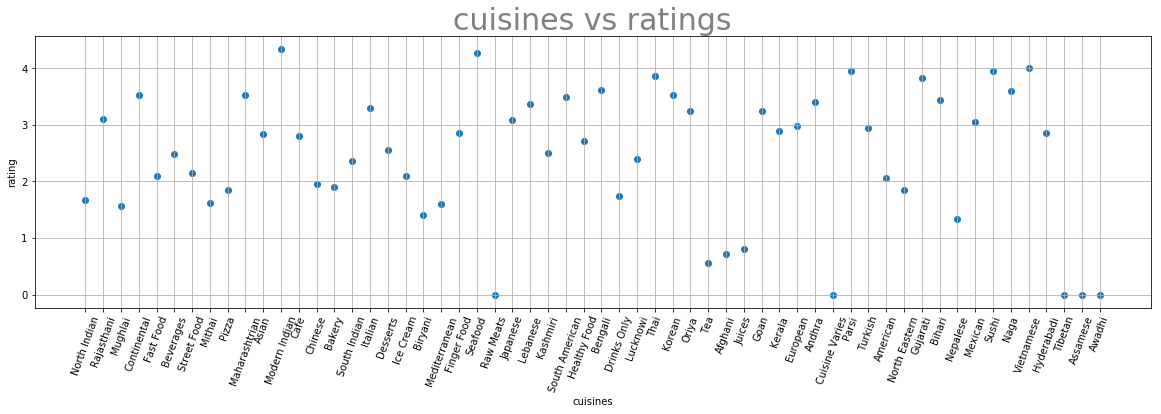

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
df.dropna(subset=['Country Code'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
cl=df[(df['Country Code']==1) & (df['Average Cost for two']!=0)]

cuisines={}
count={}
for i in range(0,len(cl['Cuisines'])):
    a=cl.iloc[i,9].split(',')
    if len(a)==1:
        #print(a[0])
        cuisines[a[0]]=cuisines.get(a[0],0)+cl.iloc[i,17]
        count[a[0]]=count.get(a[0],0)+1

for i in count:
    cuisines[i]=cuisines.get(i,0)/count[i]


cuisine=cuisines.keys()
ratings=cuisines.values()
#ratings=[]
#for i in cl['Aggregate rating']:
    #ratings.append(i)

plt.figure(figsize=(20,5))
plt.scatter(cuisine,ratings)
plt.title("cuisines vs ratings",fontsize=30,color='grey')
plt.xlabel("cuisines")
plt.ylabel("rating")
plt.xticks(rotation=70)
plt.grid()
plt.show()

## code explanation:
After dropping all nan values and storing the data related to India in a different dataset, we tranverse the Cuisines column and filtered it for restaurants serving only one cuisine. We then store the raing and count of the cuisines in two separate dictionaries. We used the count to take the average rating for each cuisine. And finally plottes a graph between the restaurants serving a particular cuisine and the average rating of the restaurant.
## graph explanation:
The graph seems scattered randomly everywhere on the plane. We can infer that the highest rating is that of 'Mordern Indian' cuisine and 'Seafood' cuisine. The lowest raing is that of 'raw meat','tibetian','Assamese' and 'Awadhi'

## ii)Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes)

C:\Users\Priyanka Patwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


top 10 localities with more weighted restaurant rating
*********************************************
Hotel Clarks Amer, Malviya Nagar 4.90
Aminabad 4.90
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Express Avenue Mall,  Royapettah 4.80
Deccan Gymkhana 4.80
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.70


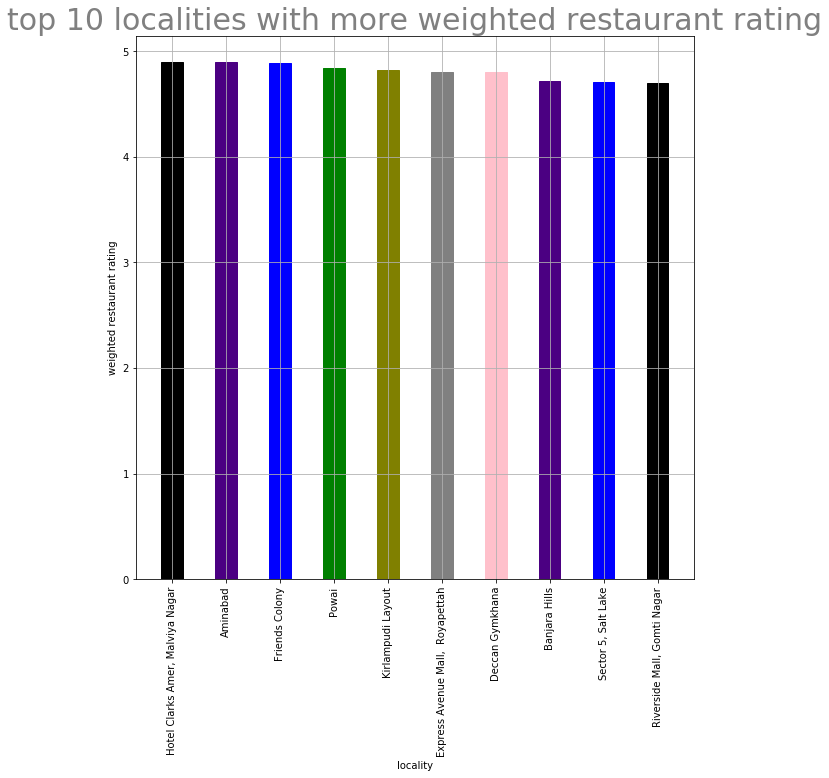

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
df.dropna(subset=['Country Code'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
cl=df[(df['Country Code']==1) & (df['Average Cost for two']!=0)]

numerator={}
denominator={}
for i in range(0,len(cl['Locality'])):
    numerator[cl.iloc[i,5]]=numerator.get(cl.iloc[i,5],0)+(cl.iloc[i,17]*cl.iloc[i,20])
    denominator[cl.iloc[i,5]]=denominator.get(cl.iloc[i,5],0)+cl.iloc[i,20]
    
for i in numerator:
    numerator[i]=numerator.get(i,0)/denominator[i]
    
#for i in numerator:
    #print(i, numerator[i])
locality=[]
average=[]
k = Counter(numerator) 
high = k.most_common(10)
print("top 10 localities with more weighted restaurant rating")
print("*********************************************")
for i in high:
    locality.append(i[0])
    average.append(i[1])
    print(i[0],"%.2f" %i[1])
    
plt.figure(figsize=(10,10))
barlist=plt.bar(locality,average,edgecolor='black',width=0.4)
barlist[0].set_color('black')
barlist[1].set_color('indigo')
barlist[2].set_color('blue')
barlist[3].set_color('green')
barlist[4].set_color('olive')
barlist[5].set_color('grey')
barlist[6].set_color('pink')
barlist[7].set_color('indigo')
barlist[8].set_color('blue')
barlist[9].set_color('black')
plt.title("top 10 localities with more weighted restaurant rating",fontsize=30,color='grey')
plt.ylabel("weighted restaurant rating")
plt.xlabel("locality")
plt.xticks(rotation=90)
plt.grid()
plt.show()


## Explanation of code:
 
We append the Rating into an array and the locality into another array and the votes into another array. We have taken a dictionary in which average rating(values) is stored with the locality(keys). We have taken a second dictionary in which votes(values) is stored with the locality(keys). We have taken a third dictionary in which weighted restaurant rating(values) is stored with the locality(keys). The weighted rating has been found out using the other two dictionaries.
## Explanation of graph:
 The weighted restaurant rating of top ten localities seems to be almost the same. The height of the bars are only gradually decreasing.



## 3.Visualization

## i) Plot the bar graph top 15 restaurants have a maximum number of outlets.

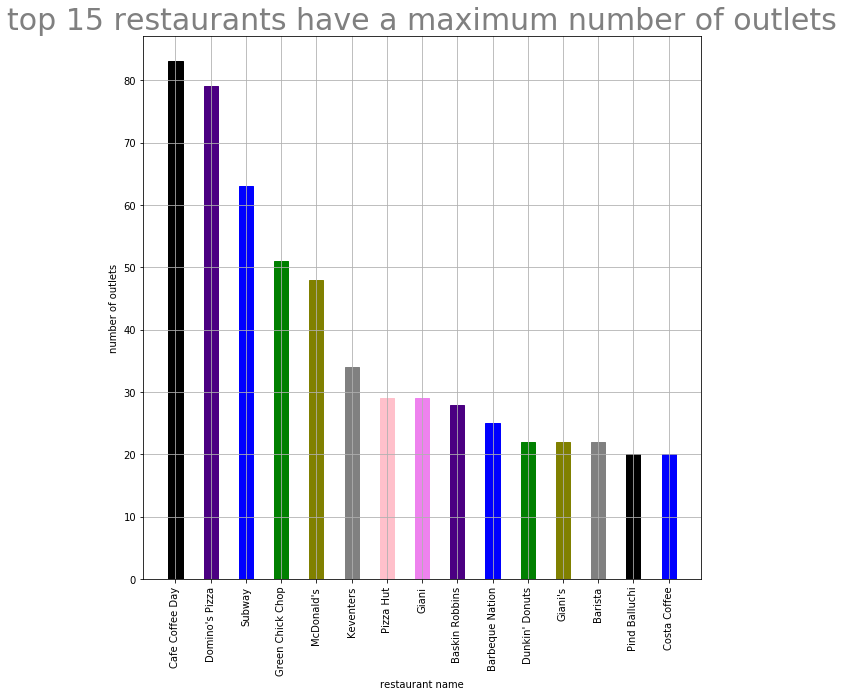

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
df.dropna(subset=['Country Code'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
cl=df[(df['Country Code']==1) & (df['Average Cost for two']!=0)]

outlets={}
for i in range(0,len(cl)):
    outlets[cl.iloc[i,1]]=outlets.get(cl.iloc[i,1],0)+1
    
restaurants=[]
outletno=[]
k = Counter(outlets) 
high = k.most_common(15)
for i in high:
    restaurants.append(i[0])
    outletno.append(i[1])
    #print(i[0],"%.2f" %i[1])

plt.figure(figsize=(10,10))
barlist=plt.bar(restaurants,outletno,edgecolor='black',width=0.4)
barlist[0].set_color('black')
barlist[1].set_color('indigo')
barlist[2].set_color('blue')
barlist[3].set_color('green')
barlist[4].set_color('olive')
barlist[5].set_color('grey')
barlist[6].set_color('pink')
barlist[7].set_color('violet')
barlist[8].set_color('indigo')
barlist[9].set_color('blue')
barlist[10].set_color('green')
barlist[11].set_color('olive')
barlist[12].set_color('grey')
barlist[13].set_color('black')
barlist[14].set_color('blue')
#barlist[9].set_color('blue')
plt.title("top 15 restaurants have a maximum number of outlets",fontsize=30,color='grey')
plt.ylabel("number of outlets")
plt.xlabel("restaurant name")
plt.xticks(rotation=90)
plt.grid()
plt.show()

## code explanation:
We took the restaurant names along with their frequencies in a dictionary and dislayed the top 15 restaurants.
## graph explanation:
From the graph we see that there is a gradual decrease in number of outlets. Cafe Coffe Day has the maximun number of outlets. Costa Coffee has the lowest number of outlets among the top 15 restaurants.

## ii) Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

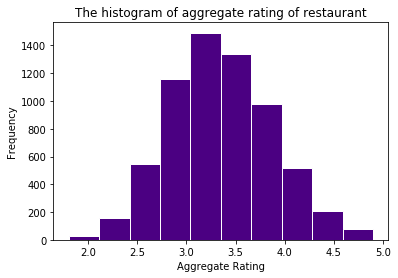

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
df.dropna(subset=['Cuisines'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['City'],inplace=True)

cl=df[(df['Country Code']==1)&(df['Average Cost for two']!=0)&(df['Aggregate rating']!=0) ]


rates=[]
for i in cl['Aggregate rating']:
    rates.append(i)

plt.hist(rates,edgecolor='white',color='indigo')
plt.title('The histogram of aggregate rating of restaurant')
plt.ylabel('Frequency')
plt.xlabel('Aggregate Rating')
plt.show()


## code explanation:
After removing the nan values and restaurants with 0 ratings, we appended all the rating in a list and plotted a histogram of the aggregate ratings.
## graph explanation:
From the graph we infer that most of the restaurants are rated between 2.7 to 3.6 (approx). Maximum rating(5) has been given to a rare number of restaurants. There are less number of restaurants in the low rating range either. 

## iii)Plot the bar graph top 10 restaurants in the data with the highest number of votes.

Barbeque Nation 27835
AB's - Absolute Barbecues 13400
Toit 10934
Big Chill 10853
Truffles 9682
Farzi Cafe 9189
Chili's 8156
Hauz Khas Social 7931
Joey's Pizza 7807
Peter Cat 7574


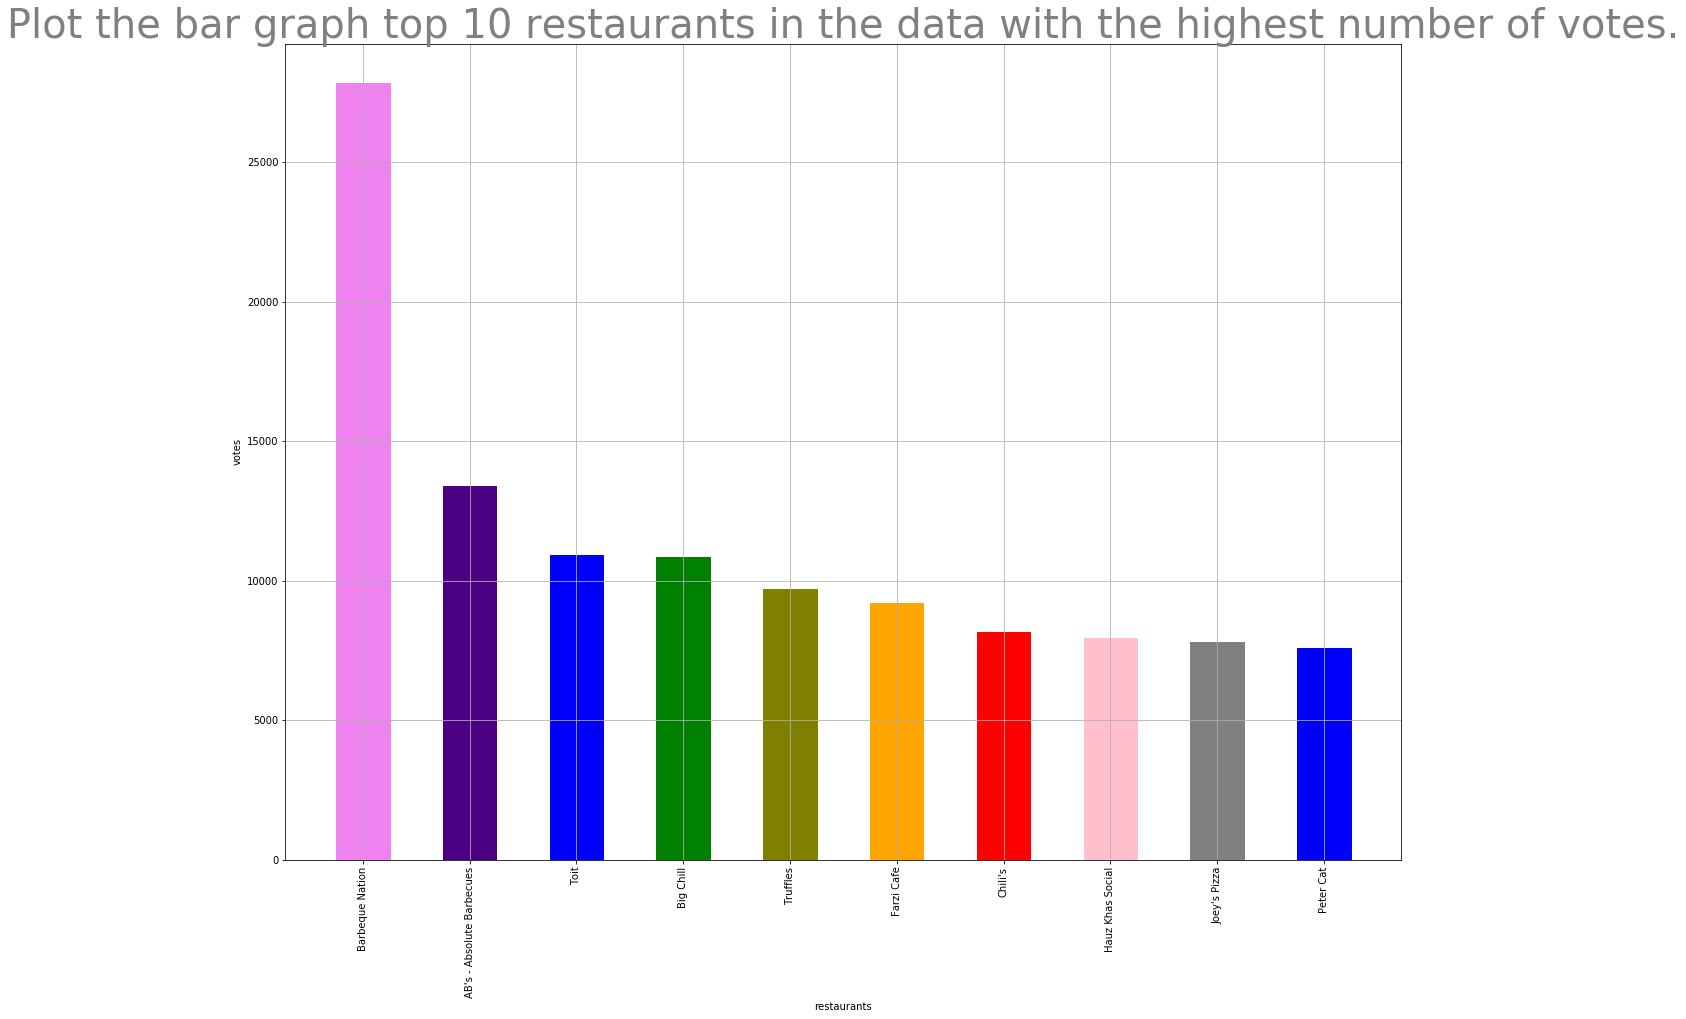

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")

df.dropna(subset=['Cuisines'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['City'],inplace=True)

cl=df[(df['Country Code']==1)&(df['Average Cost for two']!=0) ]




rname=[]
vo=[]
for i in cl['Restaurant Name']:
    rname.append(i)
for i in cl.Votes:
    vo.append(i)
dicr={}

for i in range(len(rname)):
    dicr[rname[i]]=dicr.get(rname[i],0)+vo[i]
   
t=sorted(dicr.items(),reverse=True, key=lambda x:x[1])

# Iterate over the sorted sequence
for i in range(0,10,1) :
    print(t[i][0],t[i][1])

x2=[]
y2=[]
   
 # Iterate over the sorted sequence
for i in range(0,10,1) :
    x2.append(t[i][0])
    y2.append(t[i][1])    

plt.figure(figsize=(20,15))
barlist=plt.bar(x2,y2,edgecolor='black',width=0.5)
barlist[0].set_color('violet')
barlist[1].set_color('indigo')
barlist[2].set_color('blue')
barlist[3].set_color('green')
barlist[4].set_color('olive')
barlist[5].set_color('orange')
barlist[6].set_color('red')
barlist[7].set_color('pink')
barlist[8].set_color('grey')
barlist[9].set_color('blue')
plt.title("Plot the bar graph top 10 restaurants in the data with the highest number of votes.",fontsize=40,color='grey')
plt.xlabel("restaurants")
plt.ylabel("votes")
plt.xticks(rotation=90)
plt.grid()
plt.show()

## code explanation:
We appended the resaurant names and the votes in two separate lists. We maintained a dictionary to store the restaurant name and the corresponding number of votes.
## graph explanation:
We see that Barbeque Nation has the maximum number of votes. There is a steady decresea among the rest of the restaurants but the difference between barbeque Nation and AB's is significant.

## iv) Plot the pie graph of top 10 cuisines present in restaurants in the USA.

Mexican 22
American 16
Chinese 9
BBQ 9
Japanese, Steak, Sushi 8
Italian 8
American, Seafood, Steak 8
Seafood 8
Italian, Pizza 7
American, Burger 7


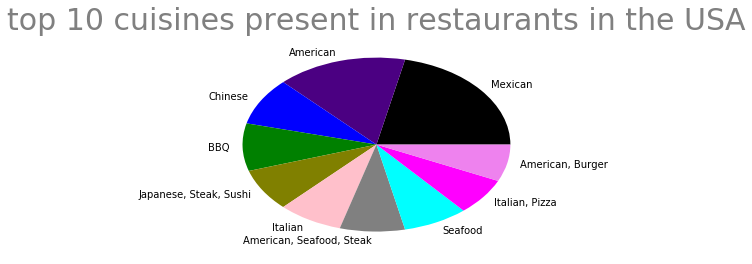

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
df.dropna(subset=['Country Code'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
cl=df[(df['Country Code']==216) & (df['Average Cost for two']!=0)]

cuisines={}
for i in range(0,len(cl)):
    cuisines[cl.iloc[i,9]]=cuisines.get(cl.iloc[i,9],0)+1
    
cuisine=[]
number=[]
k = Counter(cuisines) 
high = k.most_common(10)
for i in high:
    cuisine.append(i[0])
    number.append(i[1])

for i in range(0,len(cuisine)):
    print(cuisine[i],number[i])
color=['black','indigo','blue','green','olive','pink','grey','cyan','magenta','violet']
plt.pie(number, labels=cuisine, colors=color)
plt.title("top 10 cuisines present in restaurants in the USA",fontsize=30,color='grey')
plt.show()


## code explanation:
After extracting all details of the restaurants present in USA, we traversed the cuisine column to maintain a dictionary of the frequency of cuisines. And thus plotted a pie chart of the top 10 cuisines present in restaurants in the USA.
## graph explanation:
We see that the top cuisine in USA is Mexican followed by American. All other cuisines in the top 10 list have more or less the same significance.

## v) Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

City  Number of restaurants  Weighted rating
Albany   17   3.6907751441383723
Athens   20   4.280219607843138
Augusta   20   4.198798836768239
Boise   20   4.30093439938349
Cedar Rapids/Iowa City   20   4.281432440565754
Clatskanie   1   4.3
Cochrane   1   3.1
Columbus   19   4.142495687176538
Dalton   20   4.227723545490043
Davenport   19   4.2309982486865145
Des Moines   20   4.361548864046159
Dubuque   19   3.567128916281458
Fernley   1   3.7
Gainesville   20   4.235685117967332
Lakeview   1   3.6
Lincoln   1   4.5
Macon   20   4.2060508345978755
Mc Millan   1   2.4
Monroe   1   3.6
Ojo Caliente   1   3.6
Orlando   20   4.538759431406061
Pensacola   20   4.307643576080521
Pocatello   18   3.733647540983606
Potrero   1   3.3
Princeton   1   4.0
Rest of Hawaii   20   4.451597475921622
Savannah   20   4.1699551277882545
Sioux City   20   3.8221482889733838
Tampa Bay   20   4.507111321925056
Valdosta   20   3.7911428571428574
Vernonia   1   4.3
Waterloo   20   3.7001920307249154
Weirton

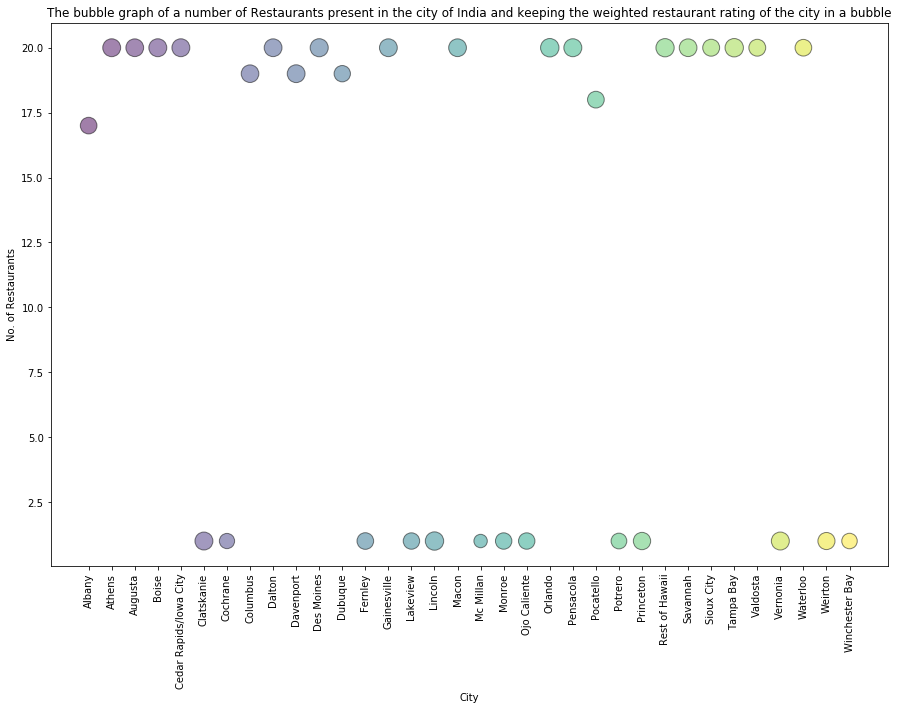

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import csv

df=pd.read_csv("zomato.csv",header=0,encoding="latin-1")
df.dropna(subset=['Country Code'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Average Cost for two'],inplace=True)
df.dropna(subset=['City'],inplace=True)
cl=df[(df['Country Code']==216) & (df['Average Cost for two']!=0)]

cn={}

for i in cl.City:
    cn[i]=cn.get(i,0)+1

City=[]
votes=[]
rating=[]



for i  in cl['Votes']:
    votes.append(i)

for i in cl['Aggregate rating']:
    rating.append(i)

for i in cl['City']:
    City.append(i)
dica={}
dicb={}
dicc={}

for i in range(len(City)):
    dica[City[i]]=dica.get(City[i],0)+votes[i]
   
   
for i in range(len(City)):
    dicb[City[i]]=dicb.get(City[i],0)+(rating[i]*votes[i])


for i in dica:
    for j in dicb:
        if(i==j)&(dica[i]!=0):
            dicc[i]=(dicb[j]/dica[i])
import numpy as np
one=[]
two=[]
three=[]
for i in cn:
    for j in dicc:
        if((i==j)&(cn[i]<50)):
            one.append(i)
            two.append(cn[i])
            three.append(dicc[j]*75)

print("City  Number of restaurants  Weighted rating")
for i in range(len(one)):
    print(one[i]," ",two[i]," ",three[i]/75)
           
c=np.arange(len(one))

           
plt.figure(figsize=(15,10))
plt.scatter(one,two,s=three,c=c,alpha=0.5,edgecolor='black')
plt.title('The bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble')
plt.xlabel('City')
plt.ylabel('No. of Restaurants')
plt.xticks(rotation=90)
plt.show();



## Explanation for code:
 
We have taken an array and stored the number of restaurants present in Cities . We append the Rating into an array and the City into another array and the votes into another array. We have taken a dictionary in which average rating(values) is stored with the City(keys). We have taken a second dictionary in which votes(values) is stored with the City(keys). We have taken a third dictionary in which weighted restaurant rating(values) is stored with the City(keys). The weighted rating has been found out using the other two dictionaries. We have multiplied the weighted rating with 75 to get relatively larger bubbles for better visualisation. Putting the arrays of number of Restaurants present in the city(y axis),city name(x axis) and weighted restaurant rating(bubble size) into the bubble plot. We have taken the cities which have number of restaurants less than 50 because the rest of the points less.
## Explanation for graph: 
We see that the number of restaurants between 15 and 25 is more. Ghaziabad has the restaurants around 25. Panchkula, Secunderabad and Mohali have less than 5 restaurants. The Weighted restaurant rating seems to be almost the same that is between 3.5 and 4.5.

